In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px
from IPython.display import Image


# Data Cleaning
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression

# Data Catching

In [2]:
path = 'datasets/titanic'
data_train = pd.read_csv(f'{path}/train.csv')
data_prod = pd.read_csv(f'{path}/test.csv')
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

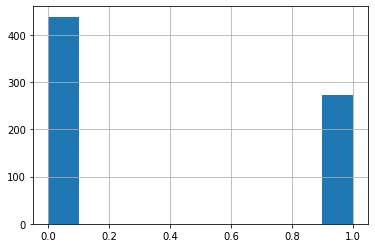

In [3]:
def stratified_shuffle_2split(X, feature):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(X, X[feature]):
        strat_train_set = X.loc[train_index]
        strat_test_set = X.loc[test_index]
        return strat_train_set, strat_test_set
train, test = stratified_shuffle_2split(data_train, 'Survived')
train.Survived.hist()

(<AxesSubplot:>, None)

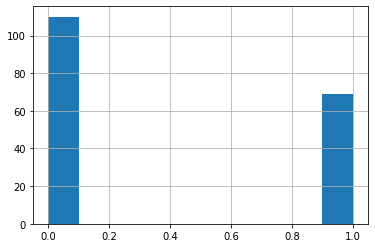

In [4]:
def plt_count_feat_pie(X, feat):
    vals = X[feat].unique()
    counts = [(X[feat] == v).sum() for v in vals]
    df = pd.DataFrame({'value': vals, 'count': counts})
    fig = px.pie(df, values='count', names='value', title=feat)
    fig.show()
test.Survived.hist(), plt_count_feat_pie(train, 'Survived') 

In [5]:
plt_count_feat_pie(train, 'Pclass')

(<AxesSubplot:>, None)

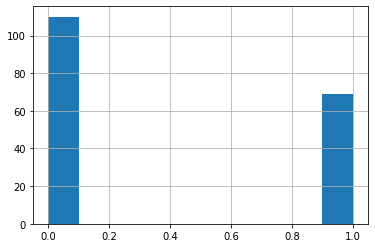

In [6]:
test.Survived.hist(), plt_count_feat_pie(test, 'Survived') 

In [7]:
plt_count_feat_pie(test, 'Pclass')

In [8]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   712.000000  712.000000  712.000000  575.000000  712.000000   
mean    444.405899    0.383427    2.308989   29.807687    0.492978   
std     257.465527    0.486563    0.833563   14.485211    1.060720   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.750000    0.000000    2.000000   21.000000    0.000000   
50%     439.500000    0.000000    3.000000   28.500000    0.000000   
75%     667.250000    1.000000    3.000000   39.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  712.000000  712.000000  
mean     0.390449   31.819826  
std      0.838134   48.059104  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         2
dtype: int64

# Data Visualization

### Sex Transformer

In [10]:
train['Sex'] = OrdinalEncoder().fit_transform(train[['Sex']])
train.head()

PassengerId  Survived  Pclass  \
692          693         1       3   
481          482         0       2   
527          528         0       1   
855          856         1       3   
801          802         1       2   

                                            Name  Sex   Age  SibSp  Parch  \
692                                 Lam, Mr. Ali  1.0   NaN      0      0   
481             Frost, Mr. Anthony Wood "Archie"  1.0   NaN      0      0   
527                           Farthing, Mr. John  1.0   NaN      0      0   
855                   Aks, Mrs. Sam (Leah Rosen)  0.0  18.0      0      1   
801  Collyer, Mrs. Harvey (Charlotte Annie Tate)  0.0  31.0      1      1   

         Ticket      Fare Cabin Embarked  
692        1601   56.4958   NaN        S  
481      239854    0.0000   NaN        S  
527    PC 17483  221.7792   C95        S  
855      392091    9.3500   NaN        S  
801  C.A. 31921   26.2500   NaN        S

In [11]:
train['Cabin'].unique()
trainNC = train.copy()
trainNC['Section'] = train['Cabin'].apply(lambda x: str(x)[0].upper() if pd.notnull(x) else 'M')#.apply(lambda x: ord(x) - ord('A'))
trainNC['Section'].unique()

array(['M', 'C', 'A', 'D', 'E', 'F', 'B', 'G', 'T'], dtype=object)

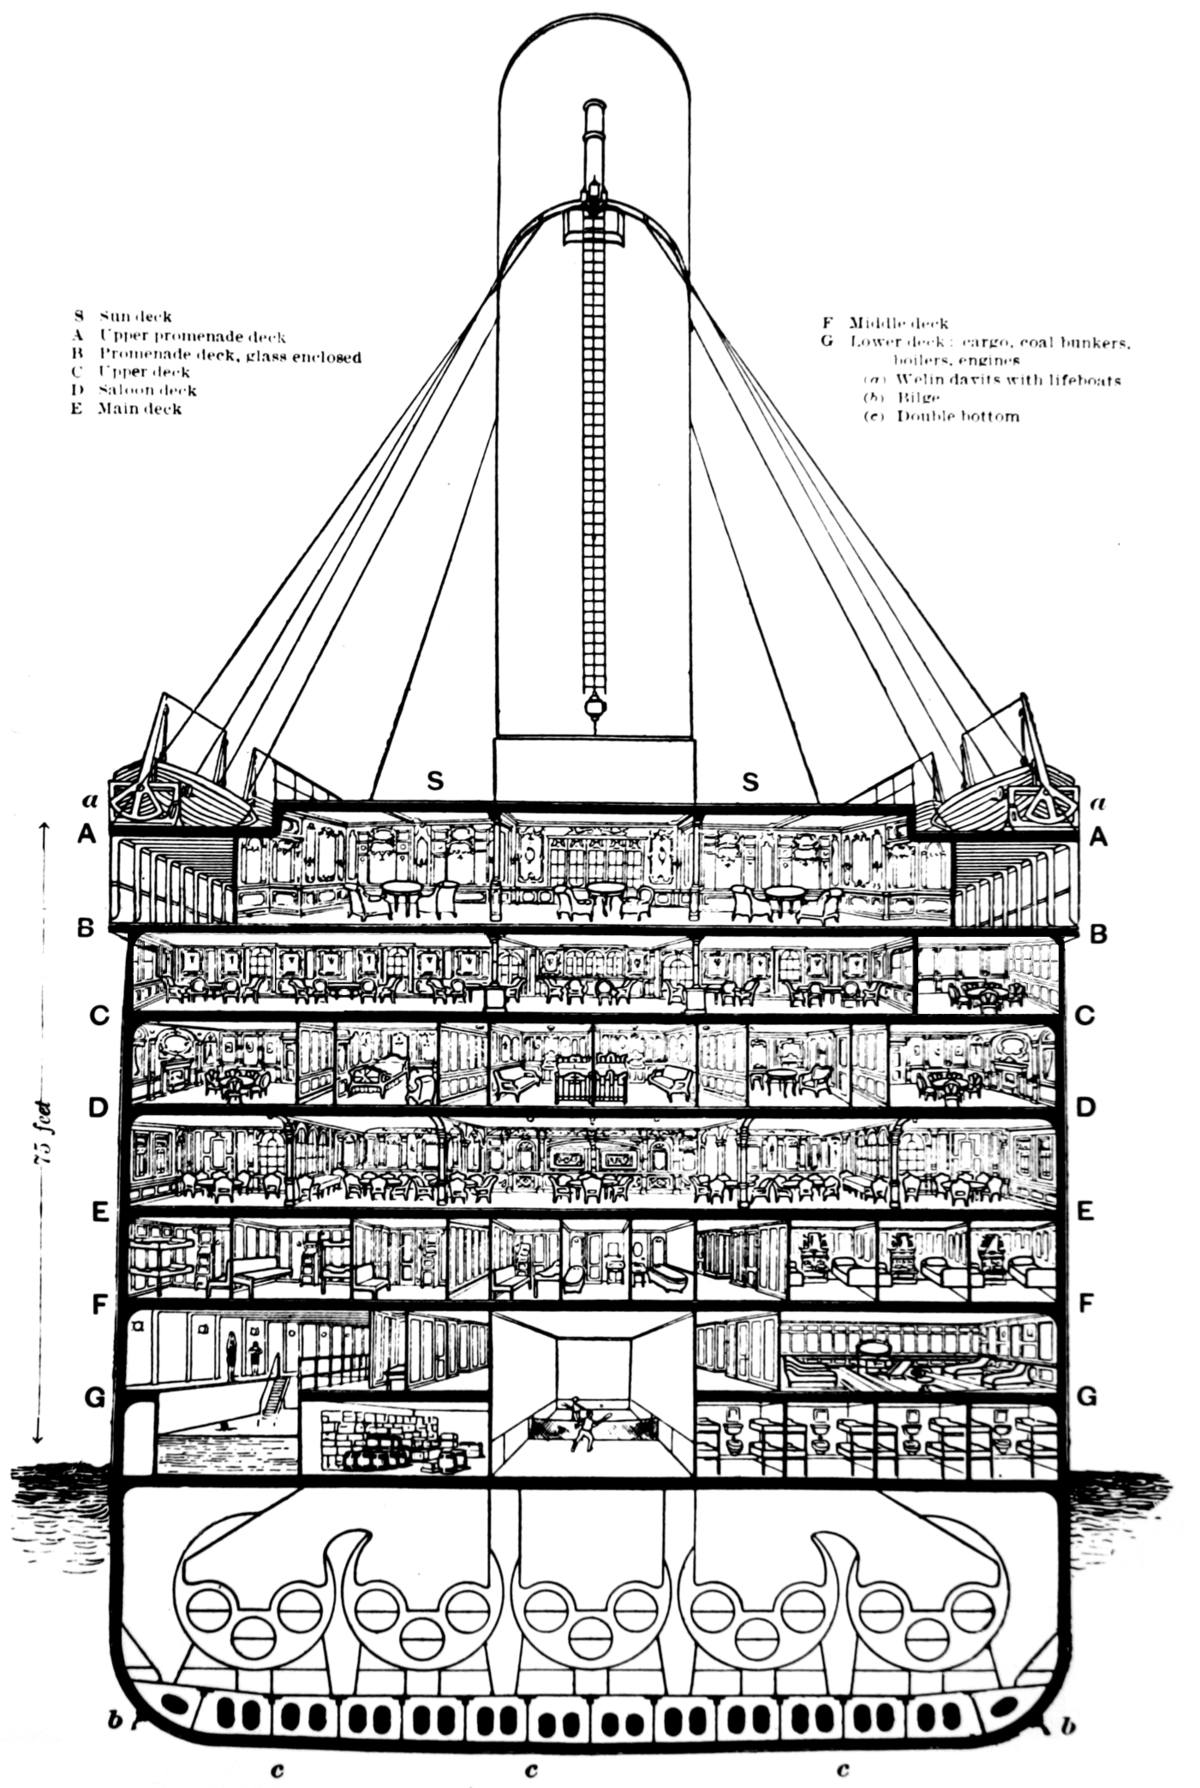

In [12]:
Image(filename=f'{path}/cabinsection.png', width=600)

<AxesSubplot:>

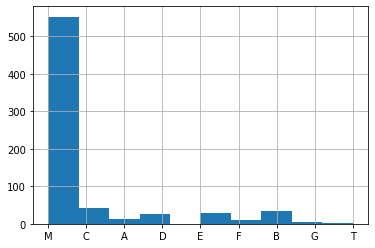

In [13]:
trainNC.Section.hist()

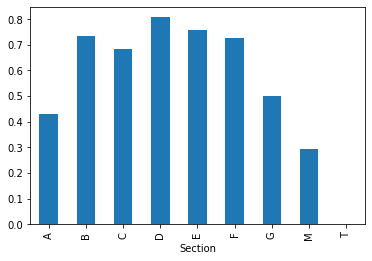

In [14]:
fig = plt.figure()
ax = trainNC.groupby('Section')['Survived'].mean().plot(kind='bar')
fig.savefig(path + '/sectionRatio.png')

In [15]:
mat = OneHotEncoder().fit_transform(trainNC[['Section']])
pd.DataFrame(mat)

0
0      (0, 7)\t1.0
1      (0, 7)\t1.0
2      (0, 2)\t1.0
3      (0, 7)\t1.0
4      (0, 7)\t1.0
..             ...
707    (0, 7)\t1.0
708    (0, 7)\t1.0
709    (0, 7)\t1.0
710    (0, 4)\t1.0
711    (0, 7)\t1.0

[712 rows x 1 columns]

<AxesSubplot:>

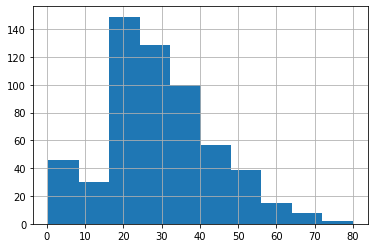

In [16]:
train.Age.hist()

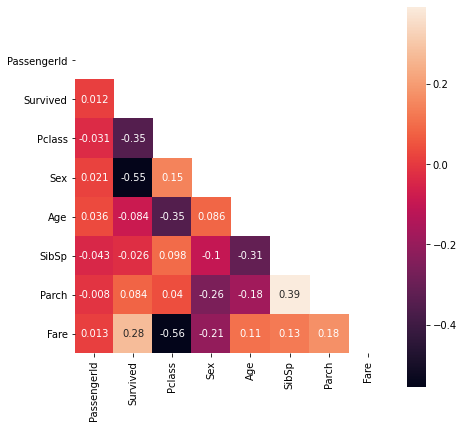

In [17]:
def show_corr(X, mask=True, figsize=(7,7), annot=True):
    fig, ax = plt.subplots(figsize=figsize)
    corr = X.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) if mask else np.ones_like(corr, dtype=bool)
    sns.heatmap(corr, mask=mask, square=True, annot=annot, ax=ax)
    plt.show()
show_corr(train)

In [18]:
corr = train.corr()
corr['Fare']['Pclass'], corr['Age']['Pclass'], corr['Pclass']['Survived'], corr['Sex']['Survived']

(-0.5565396698238977,
 -0.35108934813007464,
 -0.3480065810956011,
 -0.5491711109145088)

In [19]:
corr['Survived'].sort_values(ascending=True)

Sex           -0.549171
Pclass        -0.348007
Age           -0.084268
SibSp         -0.026115
PassengerId    0.011892
Parch          0.084178
Fare           0.275499
Survived       1.000000
Name: Survived, dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

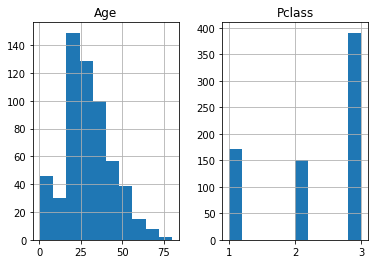

In [20]:
attrs = ['Age', 'Pclass']
train[attrs].hist()

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>]], dtype=object)

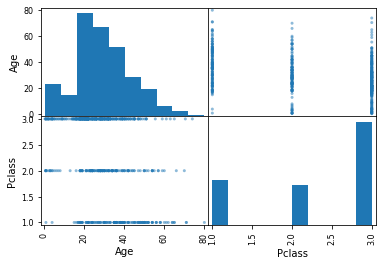

In [21]:
scatter_matrix(train[attrs])

In [22]:
corr['Fare'].sort_values(ascending=True)

Pclass        -0.556540
Sex           -0.206986
PassengerId    0.013281
Age            0.106915
SibSp          0.127011
Parch          0.177235
Survived       0.275499
Fare           1.000000
Name: Fare, dtype: float64

# Data Cleaning

In [23]:
train.head()

PassengerId  Survived  Pclass  \
692          693         1       3   
481          482         0       2   
527          528         0       1   
855          856         1       3   
801          802         1       2   

                                            Name  Sex   Age  SibSp  Parch  \
692                                 Lam, Mr. Ali  1.0   NaN      0      0   
481             Frost, Mr. Anthony Wood "Archie"  1.0   NaN      0      0   
527                           Farthing, Mr. John  1.0   NaN      0      0   
855                   Aks, Mrs. Sam (Leah Rosen)  0.0  18.0      0      1   
801  Collyer, Mrs. Harvey (Charlotte Annie Tate)  0.0  31.0      1      1   

         Ticket      Fare Cabin Embarked  
692        1601   56.4958   NaN        S  
481      239854    0.0000   NaN        S  
527    PC 17483  221.7792   C95        S  
855      392091    9.3500   NaN        S  
801  C.A. 31921   26.2500   NaN        S

### Drop Columns

In [24]:
class DropColumnsTransf(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.cols = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=self.cols, axis=1)

In [25]:
dropColumns = ['PassengerId', 'Name', 'Ticket']
drop_col_encod = DropColumnsTransf(dropColumns)
train_dropped = drop_col_encod.fit_transform(train)
train_dropped.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         137
SibSp         0
Parch         0
Fare          0
Cabin       552
Embarked      2
dtype: int64

In [26]:
train = train_dropped.copy()

### FillAgeTransformer

In [27]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch      Fare Cabin Embarked
692         1       3  1.0   NaN      0      0   56.4958   NaN        S
481         0       2  1.0   NaN      0      0    0.0000   NaN        S
527         0       1  1.0   NaN      0      0  221.7792   C95        S
855         1       3  0.0  18.0      0      1    9.3500   NaN        S
801         1       2  0.0  31.0      1      1   26.2500   NaN        S

In [28]:
mean_ages = train.groupby("Pclass")["Age"].mean()
mean_ages

Pclass
1    38.037379
2    30.119362
3    25.526540
Name: Age, dtype: float64

In [29]:
train[~train.Embarked.isna()]

Survived  Pclass  Sex   Age  SibSp  Parch      Fare Cabin Embarked
692         1       3  1.0   NaN      0      0   56.4958   NaN        S
481         0       2  1.0   NaN      0      0    0.0000   NaN        S
527         0       1  1.0   NaN      0      0  221.7792   C95        S
855         1       3  0.0  18.0      0      1    9.3500   NaN        S
801         1       2  0.0  31.0      1      1   26.2500   NaN        S
..        ...     ...  ...   ...    ...    ...       ...   ...      ...
359         1       3  0.0   NaN      0      0    7.8792   NaN        Q
258         1       1  0.0  35.0      0      0  512.3292   NaN        C
736         0       3  0.0  48.0      1      3   34.3750   NaN        S
462         0       1  1.0  47.0      0      0   38.5000   E63        S
507         1       1  1.0   NaN      0      0   26.5500   NaN        S

[710 rows x 9 columns]

In [30]:
class FillMeanByGroupTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, from_col, to_col):
        self.from_col = from_col
        self.to_col = to_col
    
    def fit(self, X, y=None):
        self.mean_ages = X.groupby(self.from_col)[self.to_col].mean()
        return self
    
    def transform(self, X):
        def getmedium():
            def apply_age(tup):
                if np.isnan(tup[self.to_col]):
                    return self.mean_ages[tup[self.from_col]]
                else:
                    return tup[self.to_col]
            return apply_age
        X[self.to_col] = X[[self.to_col, self.from_col]].apply(getmedium(), axis=1)
        return X
        

In [31]:
from_col, to_col = 'Pclass', 'Age'
fill_age_transf = FillMeanByGroupTransformer(from_col, to_col)
train = fill_age_transf.fit_transform(
    train)
train[train.Age.isna()]

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked]
Index: []

### DropNa Transformer

In [32]:
train.isna().sum(), train.isna().sum() / len(train) * 100

(Survived      0
 Pclass        0
 Sex           0
 Age           0
 SibSp         0
 Parch         0
 Fare          0
 Cabin       552
 Embarked      2
 dtype: int64,
 Survived     0.000000
 Pclass       0.000000
 Sex          0.000000
 Age          0.000000
 SibSp        0.000000
 Parch        0.000000
 Fare         0.000000
 Cabin       77.528090
 Embarked     0.280899
 dtype: float64)

In [33]:
class DropNaTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns=[]):
        self.cols = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        print(self.cols)
        for col in self.cols:
            X = X[~X[col].isna()]
        return X

dropnaEmbarked = DropNaTransformer(['Embarked'])
train = dropnaEmbarked.fit_transform(train)

['Embarked']


In [34]:
train.isna().sum()['Embarked']

0

### One Hot Encoder

In [35]:
cat_encoder = OneHotEncoder()
mat = cat_encoder.fit_transform(train[['Embarked']])
train_encoded = train.copy()
for cat, vals in zip(cat_encoder.categories_[0], mat.toarray().transpose()):
    train_encoded[cat] = vals
train_encoded.head()

Survived  Pclass  Sex        Age  SibSp  Parch      Fare Cabin Embarked  \
692         1       3  1.0  25.526540      0      0   56.4958   NaN        S   
481         0       2  1.0  30.119362      0      0    0.0000   NaN        S   
527         0       1  1.0  38.037379      0      0  221.7792   C95        S   
855         1       3  0.0  18.000000      0      1    9.3500   NaN        S   
801         1       2  0.0  31.000000      1      1   26.2500   NaN        S   

       C    Q    S  
692  0.0  0.0  1.0  
481  0.0  0.0  1.0  
527  0.0  0.0  1.0  
855  0.0  0.0  1.0  
801  0.0  0.0  1.0

In [36]:
class CatOneHotEncoderTrans(BaseEstimator, TransformerMixin):
    
    def __init__(self, column, newcolumns=None, drop=True, cats='auto'):
        self.column = column
        self.newcolumns = newcolumns
        print(column)
        self.onehot = OneHotEncoder(categories=cats)
        self.drop = drop
    
    def fit(self, X, y=None):
        self.onehot.fit(X[[self.column]], y)
        return self
    
    def transform(self, X):
        mat = cat_encoder.fit_transform(X[[self.column]])
        if self.newcolumns is None:
            self.newcolumns = cat_encoder.categories_[0]
        for cat, vals in zip(self.newcolumns, mat.toarray().transpose()):
            X[cat] = vals
        return X.drop(self.column, axis=1) if self.drop else X

In [37]:
cat_1hot_encoder = CatOneHotEncoderTrans('Embarked')
train = cat_1hot_encoder.fit_transform(train)
train.head()

Embarked


Survived  Pclass  Sex        Age  SibSp  Parch      Fare Cabin    C    Q  \
692         1       3  1.0  25.526540      0      0   56.4958   NaN  0.0  0.0   
481         0       2  1.0  30.119362      0      0    0.0000   NaN  0.0  0.0   
527         0       1  1.0  38.037379      0      0  221.7792   C95  0.0  0.0   
855         1       3  0.0  18.000000      0      1    9.3500   NaN  0.0  0.0   
801         1       2  0.0  31.000000      1      1   26.2500   NaN  0.0  0.0   

       S  
692  1.0  
481  1.0  
527  1.0  
855  1.0  
801  1.0

In [38]:
cat_1hot_encoder = CatOneHotEncoderTrans('Pclass', ['HighClass', 'MediumClass', 'LowClass'])
train = cat_1hot_encoder.fit_transform(train)
train.head()

Pclass


Survived  Sex        Age  SibSp  Parch      Fare Cabin    C    Q    S  \
692         1  1.0  25.526540      0      0   56.4958   NaN  0.0  0.0  1.0   
481         0  1.0  30.119362      0      0    0.0000   NaN  0.0  0.0  1.0   
527         0  1.0  38.037379      0      0  221.7792   C95  0.0  0.0  1.0   
855         1  0.0  18.000000      0      1    9.3500   NaN  0.0  0.0  1.0   
801         1  0.0  31.000000      1      1   26.2500   NaN  0.0  0.0  1.0   

     HighClass  MediumClass  LowClass  
692        0.0          0.0       1.0  
481        0.0          1.0       0.0  
527        1.0          0.0       0.0  
855        0.0          0.0       1.0  
801        0.0          1.0       0.0

### Cabins Transformer

In [39]:
class FirstLetterEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X)
        for c in X.columns:
            X[c] = X[c].apply(lambda x: str(x)[0].upper())
        return X

In [40]:
train.Cabin.unique()

array([nan, 'C95', 'A26', 'C78', 'D15', 'E49', 'C52', 'C104', 'A5',
       'F G73', 'E44', 'B96 B98', 'D30', 'C45', 'G6', 'C70',
       'B57 B59 B63 B66', 'B80', 'F E69', 'C106', 'E8', 'D9', 'E68',
       'D17', 'B58 B60', 'C125', 'B18', 'C83', 'B3', 'F33', 'C92', 'E121',
       'B22', 'E33', 'C23 C25 C27', 'E67', 'B35', 'C85', 'F2', 'E12',
       'A14', 'B86', 'A10', 'D45', 'C47', 'D33', 'D6', 'C91', 'C62 C64',
       'C65', 'B101', 'A7', 'A31', 'D49', 'D11', 'D35', 'E101', 'B69',
       'B102', 'C7', 'C2', 'C124', 'C82', 'B4', 'A34', 'D26', 'C110',
       'A19', 'B42', 'A16', 'B78', 'B94', 'B50', 'E34', 'C99', 'C118',
       'D10 D12', 'E46', 'B39', 'B19', 'C68', 'B37', 'A20', 'B30', 'A24',
       'D56', 'E58', 'E25', 'E36', 'F4', 'T', 'D', 'C126', 'C32',
       'C22 C26', 'E17', 'C90', 'D19', 'E24', 'D47', 'E38', 'B82 B84',
       'B49', 'E50', 'C93', 'F G63', 'D21', 'E77', 'C46', 'E10', 'D20',
       'A32', 'C123', 'A23', 'E40', 'B20', 'A36', 'D36', 'B77', 'B73',
       'C54', 'B5'

In [41]:
train['Cabin'] = FirstLetterEncoder().fit_transform(train['Cabin'])
train.head()

Survived  Sex        Age  SibSp  Parch      Fare Cabin    C    Q    S  \
692         1  1.0  25.526540      0      0   56.4958     N  0.0  0.0  1.0   
481         0  1.0  30.119362      0      0    0.0000     N  0.0  0.0  1.0   
527         0  1.0  38.037379      0      0  221.7792     C  0.0  0.0  1.0   
855         1  0.0  18.000000      0      1    9.3500     N  0.0  0.0  1.0   
801         1  0.0  31.000000      1      1   26.2500     N  0.0  0.0  1.0   

     HighClass  MediumClass  LowClass  
692        0.0          0.0       1.0  
481        0.0          1.0       0.0  
527        1.0          0.0       0.0  
855        0.0          0.0       1.0  
801        0.0          1.0       0.0

In [42]:
first_letters_cabin = list(train.Cabin.unique())
first_letters_cabin

['N', 'C', 'A', 'D', 'E', 'F', 'B', 'G', 'T']

In [43]:
train.head()

Survived  Sex        Age  SibSp  Parch      Fare Cabin    C    Q    S  \
692         1  1.0  25.526540      0      0   56.4958     N  0.0  0.0  1.0   
481         0  1.0  30.119362      0      0    0.0000     N  0.0  0.0  1.0   
527         0  1.0  38.037379      0      0  221.7792     C  0.0  0.0  1.0   
855         1  0.0  18.000000      0      1    9.3500     N  0.0  0.0  1.0   
801         1  0.0  31.000000      1      1   26.2500     N  0.0  0.0  1.0   

     HighClass  MediumClass  LowClass  
692        0.0          0.0       1.0  
481        0.0          1.0       0.0  
527        1.0          0.0       0.0  
855        0.0          0.0       1.0  
801        0.0          1.0       0.0

In [44]:
cat1hotcabin = CatOneHotEncoderTrans('Cabin')
train = cat1hotcabin.fit_transform(train)
train.head()

Cabin


Survived  Sex        Age  SibSp  Parch      Fare    C    Q    S  \
692         1  1.0  25.526540      0      0   56.4958  0.0  0.0  1.0   
481         0  1.0  30.119362      0      0    0.0000  0.0  0.0  1.0   
527         0  1.0  38.037379      0      0  221.7792  1.0  0.0  1.0   
855         1  0.0  18.000000      0      1    9.3500  0.0  0.0  1.0   
801         1  0.0  31.000000      1      1   26.2500  0.0  0.0  1.0   

     HighClass  MediumClass  LowClass    A    B    D    E    F    G    N    T  
692        0.0          0.0       1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
481        0.0          1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
527        1.0          0.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
855        0.0          0.0       1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
801        0.0          1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

In [45]:
first_letters_cabin = list(cat1hotcabin.onehot.categories_)
first_letters_cabin

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'], dtype=object)]

### Correlation

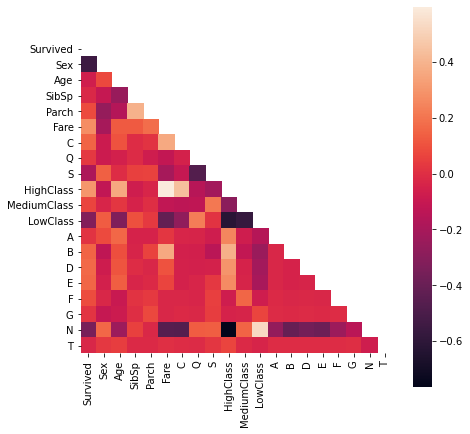

In [46]:
show_corr(train, annot=False)

In [47]:
def get_maxcorrs_of_cols(X, col):
    return X.corr()[col].apply(abs).sort_values(ascending=True)[-4:]
get_maxcorrs_of_cols(train, 'Age')

SibSp        0.248041
LowClass     0.329444
HighClass    0.359212
Age          1.000000
Name: Age, dtype: float64

In [48]:
get_maxcorrs_of_cols(train, 'SibSp')

Fare     0.128546
Age      0.248041
Parch    0.391898
SibSp    1.000000
Name: SibSp, dtype: float64

Create a LinearRegression of SibSp and Pclass can be worth it!

### Pipeline

In [49]:
train = data_train.copy().dropna(subset=['Embarked'])

cats_1hot = ['Pclass', 'Embarked', 'Cabin']
cats_fill = ['Age']
cats_pipeline = np.array(cats_1hot + cats_fill)

pipeline = Pipeline([
    ('fillage', FillMeanByGroupTransformer(from_col, to_col)),
    ('cat1hotclass', CatOneHotEncoderTrans('Pclass', ['HighClass', 'MediumClass', 'LowClass'])),
])

cabin_pipeline = Pipeline([
    ('firstletter', FirstLetterEncoder()),
    ('cat1hotCan', CatOneHotEncoderTrans('Cabin')),
])

sex_pipeline = Pipeline([
    ('sex_ordinal', OrdinalEncoder()),
])

embarked_pipeline = Pipeline([
    ('cat1hotemb', CatOneHotEncoderTrans('Embarked')),
])

col_transf = ColumnTransformer([
    ('cabin_pipeline', cabin_pipeline, ['Cabin']),
    ('sex_pipeline', sex_pipeline, ['Sex']),
    ('embarked_pipeline', embarked_pipeline, ['Embarked']),
    ('other_pipeline', pipeline, cats_pipeline),
],remainder='drop')
res = col_transf.fit_transform(train)
pd.DataFrame(res[:4])

Pclass
Cabin
Embarked
Cabin


/home/oriol/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



TypeError: object of type 'NoneType' has no len()

# Selecting and Training a Model

In [ ]:
X_train, y_train = col_transf.fit_transform(train.drop('Survived', axis=1)), train['Survived']
X_train[0], len(X_train[0])

### RandomForestClassifier

In [ ]:
param_grid = [
    {
        'bootstrap' : [True, False],
        'n_estimators': [3, 5, 6, 8, 9, 10, 30, 50, 60, 80],
        'max_features' : [2, 4, 5, 6, 8, 10],
        'random_state' : [x for x in range(10)]
    }
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_params = grid_search.best_params_
best_params

In [ ]:
y_train_pred = grid_search.best_estimator_.predict(X_train)
accuracy_score(y_train, y_train_pred)

In [ ]:
recall_score(y_train, y_train_pred)

In [ ]:
(y_train == 1).sum(), (y_train == 0).sum()

In [ ]:
test

In [ ]:
test.Cabin.unique()

In [ ]:
trfd_test = col_transf.fit_transform(test)
pd.DataFrame(trfd_test).head()

In [ ]:
X_test, y_test = trfd_test, test['Survived']

In [ ]:
len(X_test[0]), y_test

In [ ]:
y_test_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_test_pred)

In [ ]:
recall_score(y_test, y_test_pred)

In [ ]:
forest_reg = RandomForestClassifier(**best_params)

In [ ]:
X_real_train = pd.concat([X_train, X_test])
y_real_train = pd.concat([y_train, y_test])

In [ ]:
forest_reg.fit(X_real_train, y_real_train)

In [ ]:
y_real_pred = forest_reg.predict(X_real_train)
accuracy_score(y_real_train, y_real_pred)

In [ ]:
recall_score(y_real_train, y_real_pred)

In [ ]:
prod = pipeline.fit_transform(data_prod)
prod['Sex'] = col_transformer.fit_transform(prod)
prod['Sex'] = prod['Sex'].apply(lambda x: 0.0 if x else 1.0)
prod.head()

In [ ]:
prod.isna().sum()

In [ ]:
prod["Fare"] = prod["Fare"].fillna(prod["Fare"].mean())

In [ ]:
pred = forest_reg.predict(prod)
pred

In [ ]:
output = pd.DataFrame({'PassengerId': data_prod.PassengerId, 'Survived': pred})
output.to_csv('my_submission.csv', index=False)
output.head()

In [ ]:
output

### Linear Regression

In [ ]:
lin_reg = LogisticRegression()
lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
recall_score(pred, y_test)

In [ ]:
y_real_pred = lin_reg.predict(X_real_train)
accuracy_score(y_real_train, y_real_pred), recall_score(y_real_train, y_real_pred)